# Assessment

Welcome to ME334!

The goal of the coding portion of the assessment is to familiarize you with basic tools that are very generally useful for conducting practical computation to solve difficult problems in dynamics. In particular, we hope to use these notebooks to encourage you to practice development using Python as an alternative to Matlab due to its growing presence both in research and industry. We hope to walk you through _why_ and _how_ we do certain things using these text blocks. If you have questions, please reach out to the course staff!

## Problem 1: Matrix/Vector Computation and Syntax

### Tutorial on Syntax and Usage + Caveats

If you've mostly used Matlab up until now, then doing matrix/vector computations in Python will seem like a huge headache. Part of the reason for the major syntactical differences is that Python is not primarily a language built for scientific computing. Because of this, `numpy` must largely conform to the standards of Python, which makes its usage a bit clunkier, since it most naturally deals with data structures like lists, but has no native support for things like matrices (which is what Matlab was built for).

This tutorial section will try to clear up some of the roadblocks to make your life a bit easier. If you're already familiar with this, feel free to completely skip it. To run notebook cells, press `shift+enter` on a cell.

In [2]:
# imports
import numpy as np
from matplotlib import rc
rc('animation', html='jshtml')

Vectors and matrices are defined using the `np.array(...)` function. Note that there is also a `np.matrix(...)` function, but it is _not_ good practice to use this, as it will become deprecated in the future and everything you can do with matrices, you can do using array objects. Also, part of the reason for the creation of the `matrix` class was the lack of special operators for matrix computation. Recent versions of numpy have completely dispensed with this limitation, largely limiting the utility of `matrix` to very specific situations.

Below, you can see that to define a vector, we simply pass in a list of numbers and wrap it with an `array` call. To define matrices, we pass in a _list of lists_, and each sublist counts as a row of the matrix. This generalizes to higher-dimensional tensors, but you don't need to be familiar with that.

In [3]:
# matrix/vector examples
y = np.array([1, 2, 3])
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])

print(f"This is the vector: {y}")
print(f"This is the matrix:\n {A}")

This is the vector: [1 2 3]
This is the matrix:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


To do matrix-vector multiplication, we do not use the `*` operator. Instead, there is a specially-defined operator `@`. The former is reserved for _element-wise_ multiplication, whereas the latter is reserved for matrix-matrix or matrix-vector products.

In [ ]:
# matrix-vector multiplication
mat_vec = A @ y
mat_mat = A @ A
vec_elementwise = y * y
print(f"Matrix-vector multiplication: {mat_vec}")
print(f"Matrix-matrix multiplication: \n {mat_mat}")
print(f"Element-wise product: {vec_elementwise}")

Matrix-vector multiplication: [14 32 50]
Matrix-matrix multiplication: 
 [[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]
Element-wise product: [1 4 9]


One caveat is that 1-D numpy arrays are by default _flat_. This means that there is no distinction betweens rows and columns and numpy will automatically try to figure out what you want using _broadcasting_, which you can think of as automatically figuring out how to vectorize operations for you by analyzing the shapes of the inputs. This is a bit of a departure from Matlab, where you have to carefully treat rows and columns differently yourself and transpose things as needed.

Let's see a demonstration of this effect.

In [ ]:
# broadcasting demonstration
result1 = y @ A
result2 = A @ y

print(f"1x3 result: {result1}")
print(f"3x1 result: {result2}")
print(f"Shape of result1: {result1.shape}")
print(f"Shape of result2: {result2.shape}")

1x3 result: [30 36 42]
3x1 result: [14 32 50]
Shape of result1: (3,)
Shape of result2: (3,)


As you can see, the multiplied results are different, but they are both displayed as a row. Numpy automatically determines what shape the inputs should be and there is no error. On the other hand, vector-vector products using `@` syntax are automatically interpreted as dot products. If you want to compute an outer product, use the `np.outer(...)` function.

In [ ]:
# inner vs. outer products
inner = y @ y
outer = np.outer(y, y)

print(f"Inner product: {inner}")
print(f"Outer product:\n {outer}")

Inner product: 14
Outer product:
 [[1 2 3]
 [2 4 6]
 [3 6 9]]


If you need to specify a second axis of a vector explicitly for some reason or another, there are a few ways to do it, some of which we show here.

In [ ]:
# method 1
one_by_three = y[None, :]
three_by_one = y[:, None]
print(f"Method 1:\n {one_by_three}\n\n {three_by_one}\n")

# method 2
one_by_three = y[np.newaxis, :]
three_by_one = y[:, np.newaxis]
print(f"Method 2:\n {one_by_three}\n\n {three_by_one}\n")

# method 3
one_by_three = np.expand_dims(y, axis=0)
three_by_one = np.expand_dims(y, axis=1)
print(f"Method 3:\n {one_by_three}\n\n {three_by_one}\n")

# printing the shape
print(f"1x3 shape: {one_by_three.shape}")
print(f"3x1 shape: {three_by_one.shape}")

Method 1:
 [[1 2 3]]

 [[1]
 [2]
 [3]]

Method 2:
 [[1 2 3]]

 [[1]
 [2]
 [3]]

Method 3:
 [[1 2 3]]

 [[1]
 [2]
 [3]]

1x3 shape: (1, 3)
3x1 shape: (3, 1)


Finally, there is a very large collection of standard linear algebra operations that you might want to perform. These are explained in the documentation, which you can very quickly access by using any search engine. We also recommend you look at websites like StackExchange to see common examples of correct syntax and usage. A caveat is that you need to remember to call `np.linalg.your_function` when using these functions, or you'll get an error. Here's an example (note how there's similarly a `random` library in numpy).

In [ ]:
# example of linalg
A = np.random.rand(3, 3)
A_inv = np.linalg.inv(A)
print(f"Inverting a random matrix:\n {A_inv}")

Inverting a random matrix:
 [[-0.22689281  2.03960155 -0.93946285]
 [ 1.21081875  3.29334651 -4.98354706]
 [-0.11616633 -4.73698515  6.12636665]]


### Your Submission

Make some cells in this subsection and answer the following questions (please submit the actual notebook outputs or the PDF of your entire notebook):

(a) Solve the equation $y=Ax$, where
$$A = \begin{bmatrix}6&2&4\\3&5&7\\3&1&9\end{bmatrix},\quad x = \begin{bmatrix}2\\4\\6\end{bmatrix},$$
and print the value of $y$.

(b) Compute the determinant of $A$ and print it.

(c) Compute the SVD of $A$, i.e. $A=U\Sigma V^*$, where $V^*$ is the _Hermitian_ of some matrix $V$. In particular, print the values $U, \Sigma, V^*$ and also show that $U\Sigma V^*$ equals $A$.

In [14]:
# Solution to y = Ax
A = np.array([[6, 2, 4], [3, 5, 7], [3, 1, 9]])
x = np.array([2, 4, 6])
y = A @ x
print(f"y: {y} \n")

# det(A)
det_A = np.linalg.det(A)
print(f"Determinant of A: {det_A} \n")

# SVD of A
U, s, V = np.linalg.svd(A)
print(f"U: {U} \n")
print(f"Sigma: {np.diag(s)} \n")
print(f"V*: {V} \n")
print(f"Proof of SVD equality: \n {U @ np.diag(s) @ V} = \n {A}")

y: [44 68 64] 

Determinant of A: 167.99999999999997 

U: [[-0.46701751  0.82957973  0.3060917 ]
 [-0.61236448 -0.05370838 -0.78874911]
 [-0.63789058 -0.55579932  0.53308791]] 

Sigma: [[14.34983968  0.          0.        ]
 [ 0.          3.85431646  0.        ]
 [ 0.          0.          3.03749005]] 

V*: [[-0.45665111 -0.32291288 -0.82897348]
 [ 0.81699448  0.21659307 -0.53442255]
 [ 0.35212184 -0.92131141  0.16491057]] 

Proof of SVD equality: 
 [[6. 2. 4.]
 [3. 5. 7.]
 [3. 1. 9.]] = 
 [[6 2 4]
 [3 5 7]
 [3 1 9]]


## Problem 2: Dynamics Simulation

### Tutorial

This section is meant to introduce you to tools that will help solve differential equations numerically (and therefore allow you to simulate some dynamical model). For scientific computing tools like solvers for _initial value problems_, we use `scipy`. For visualization, the most common library is `matplotlib`, which borrows syntax heavily from Matlab. The documentation is [here](https://matplotlib.org/stable/index.html), though we recommend using a search engine to find more specific results first, rather than navigating the documentation from the homepage.

For the animations, you need to make sure that your local machine has `ffmpeg` installed. See the installation instructions in the assignment handout.

In [16]:
# imports
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from scipy.integrate import solve_ivp

# run this one time per notebook when you need to animate things
%matplotlib inline

The standard method for integrating dynamics is the `solve_ivp` function. Most ODE solvers have a common _application programming interface_ (API), or some functional form for usage. You need a _dynamics model_ $\dot{x}=f(t, x)$, an _initial condition_ $x_0$, and an _integration time interval_ $[t_0, t_f]$. Once you have these, then the solution trajectory can be computed numerically. See this example for the setup.

The documentation can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp).

In [ ]:
# dynamics example
def example_dyn(t, x):
    dx1 = x[1]
    dx2 = -x[0]
    return np.array([dx1, dx2])

tspan = np.array([0, 10])  # integrate from 0 to 10 seconds
x0 = np.array([1, 0])  # start at position (1, 0)
t_eval = np.linspace(0, 10, 101)  # evaluate the solution every 0.1 seconds over the integration interval
sol = solve_ivp(example_dyn, tspan, x0, t_eval=t_eval)  # return a solution object from solve_ivp. See docs.

x_coords = sol.y[0, :]  # extracting the relevant coordinates from the solution data structure for plotting
y_coords = sol.y[1, :]

It's often useful to plot and animate the solution trajectories so we can get a sense of what's going on. Being good at visualizing information is critical for checking your work and also for showing results to colleagues in an easy-to-parse manner. Here are some examples of the standard that we expect of plots. Animations are mostly for your own benefit, since we can't view those in a PDF.

The documentation for animations are [here](https://matplotlib.org/stable/api/animation_api.html).

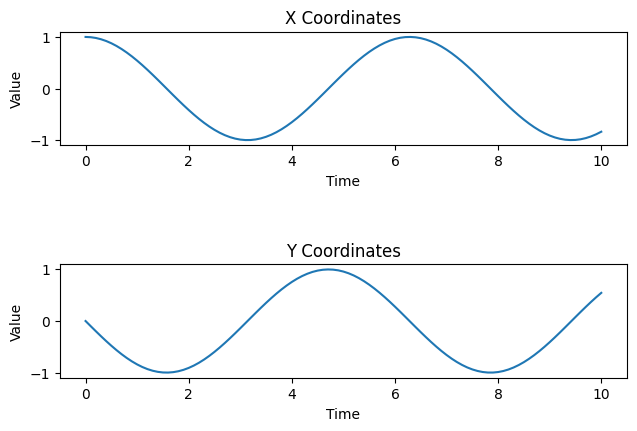

In [ ]:
# plots for x/y data
fig, axs = plt.subplots(2, 1)  # subplots are extremely useful for syncing up different plots at once!
fig.tight_layout()  # ensures plot features like axis labels don't overlap

axs[0].plot(t_eval, x_coords)
axs[0].set_title('X Coordinates')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Value')
axs[0].set_aspect('equal', adjustable='box')

axs[1].set_title('Y Coordinates')
axs[1].plot(t_eval, y_coords)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Value')
axs[1].set_aspect('equal', adjustable='box')

In [ ]:
# plot setup for animation
fig, ax = plt.subplots()
ax.set_xlim([-np.pi - 0.5, np.pi + 0.5])  # vvv --- axis settings --- vvv
ax.set_ylim([-np.pi - 0.5, np.pi + 0.5])
ax.set_xticks([i - 3 for i in range(7)])
ax.set_yticks([i - 3 for i in range(7)])
ax.set_aspect('equal', adjustable='box')
ax.set_title('Example Animation')
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax = plt.scatter([], [])  # initialize scatter axes for API compliance in the lambda below
plt.close()  # closes the automatically opened empty plot from scatter() call

anim_lambda = lambda i: ax.set_offsets([x_coords[i], y_coords[i]])  # lambda func for scatter plotting the motion
ani = animation.FuncAnimation(fig, anim_lambda, frames=len(t_eval), interval=20)
ani

### Your Submission

<div>
<img src=https://drive.google.com/uc?export=view&id=1xjbIn-DdgdS50bBLh1-pRr_vp3apMcrR width="300">
</div>

The dynamical model of some pendulum system is given by
$$\dot{x} = \begin{bmatrix}\dot{\theta}\\\ddot{\theta}\end{bmatrix}.$$
(a) Code the dynamics below, solve it using `solve_ivp` with initial condition $x_0=[1, 0]$ from 0 to 10 seconds,

(b) show a plot of $\theta$ and $\dot{\theta}$ over time, and

(c) animate the pendulum head to see it oscillating in Cartesian coordinates (note that you must convert the solution in angular space to Cartesian coordinates).

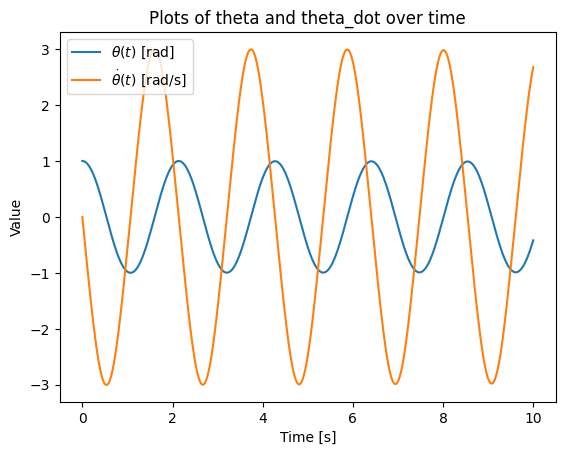

In [41]:
# Dynamics and initial value problem
def pendulum_dynamics(t, x):
    theta, omega = x
    theta_dot = omega
    omega_dot = -9.81 * np.sin(theta)
    return np.array([theta_dot, omega_dot])

t_eval = np.linspace(0, 10, 1000)
sol = solve_ivp(pendulum_dynamics, [0, 10], [1, 0], t_eval=t_eval)

# Plots of theta and theta_dot over time
plt.plot(sol.t, sol.y[0], label=r'$\theta(t)$ [rad]')  # theta(t)
plt.plot(sol.t, sol.y[1], label=r'$\dot{\theta}(t)$ [rad/s]')  # omega(t)
plt.title('Plots of theta and theta_dot over time')
plt.xlabel('Time [s]')
plt.ylabel('Value')
plt.legend()
plt.show()
# fig, ax = plt.figure(), plt.axes()

# Animation
# x = np.sin(sol.y[0])
# y = np.cos(sol.y[0])
# anim_lambda = lambda i: ax.set_offsets([sol.y[0], sol.y[1]])  # lambda func for scatter plotting the motion
# ani = animation.FuncAnimation(fig, anim_lambda, frames=len(t_eval), interval=20)
